In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os   
import random
import math
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from faker import Faker

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Analyzing Traffic Crash Data in New York (2012-2024)

### After thoroughly cleaning and preprocessing the dataset on traffic crashes in New York from 2012 to 2024, a particularly striking observation emerged: the significant number of injuries sustained by motorists. This finding underscores the critical importance of examining the factors contributing to these incidents and exploring potential measures to enhance road safety for all users.

### This introduction sets the stage for a deeper dive into the data and emphasizes the importance of the findings related to cyclist and motorist injuries.

In [23]:
pd.set_option('display.max_rows', None)

In [2]:
accidents = pd.read_csv('\\Users\\Andrea\\CSV\\Motor_Vehicle_Collisions_-_Crashes_20240822.csv',
                         parse_dates=[0])
accidents.head()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_21476\738481292.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv('\\Users\\Andrea\\CSV\\Motor_Vehicle_Collisions_-_Crashes_20240822.csv',


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


## Cleaning data

In [3]:
for col in accidents.columns:
    null = accidents[col].isnull().sum()
    print(col,null)

CRASH DATE 0
CRASH TIME 0
BOROUGH 657226
ZIP CODE 657486
LATITUDE 241295
LONGITUDE 241295
LOCATION 241295
ON STREET NAME 451325
CROSS STREET NAME 803522
OFF STREET NAME 1753822
NUMBER OF PERSONS INJURED 18
NUMBER OF PERSONS KILLED 31
NUMBER OF PEDESTRIANS INJURED 0
NUMBER OF PEDESTRIANS KILLED 0
NUMBER OF CYCLIST INJURED 0
NUMBER OF CYCLIST KILLED 0
NUMBER OF MOTORIST INJURED 0
NUMBER OF MOTORIST KILLED 0
CONTRIBUTING FACTOR VEHICLE 1 7042
CONTRIBUTING FACTOR VEHICLE 2 330134
CONTRIBUTING FACTOR VEHICLE 3 1961119
CONTRIBUTING FACTOR VEHICLE 4 2078408
CONTRIBUTING FACTOR VEHICLE 5 2103439
COLLISION_ID 0
VEHICLE TYPE CODE 1 14257
VEHICLE TYPE CODE 2 408766
VEHICLE TYPE CODE 3 1966756
VEHICLE TYPE CODE 4 2079621
VEHICLE TYPE CODE 5 2103724


In [4]:
accidents.shape

(2112774, 29)

In [5]:
accidents.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.871479e+06,1.871479e+06,2.112756e+06,2.112743e+06,2.112774e+06,2.112774e+06,2.112774e+06,2.112774e+06,2.112774e+06,2.112774e+06,2.112774e+06
mean,4.062285e+01,-7.374330e+01,3.149668e-01,1.519825e-03,5.714004e-02,7.516185e-04,2.741846e-02,1.178545e-04,2.264610e-01,6.266643e-04,3.187398e+06
std,2.029203e+00,3.806536e+00,7.046582e-01,4.115326e-02,2.452130e-01,2.798641e-02,1.653645e-01,1.089896e-02,6.659265e-01,2.735665e-02,1.506084e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066768e+01,-7.397480e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.164313e+06
50%,4.072065e+01,-7.392718e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.692644e+06
75%,4.076963e+01,-7.386674e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.221073e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.749552e+06


In [6]:
accidents.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [7]:
accidents=accidents.drop(['LATITUDE',
                   'CRASH TIME',
                   'LONGITUDE',
                   'LOCATION',
                   'ON STREET NAME',
                   'CROSS STREET NAME',
                   'OFF STREET NAME',
                   'NUMBER OF PERSONS INJURED',
                   'NUMBER OF PERSONS KILLED',
                   'COLLISION_ID',
                   'CONTRIBUTING FACTOR VEHICLE 1',
                   'CONTRIBUTING FACTOR VEHICLE 2',
                   'CONTRIBUTING FACTOR VEHICLE 3',
                   'CONTRIBUTING FACTOR VEHICLE 4',
                   'CONTRIBUTING FACTOR VEHICLE 5',
                   'VEHICLE TYPE CODE 1',
                   'VEHICLE TYPE CODE 2',   
                   'VEHICLE TYPE CODE 3',
                   'VEHICLE TYPE CODE 4',
                   'VEHICLE TYPE CODE 5'], axis=1)

In [8]:
accidents.head()

,CRASH DATE,BOROUGH,ZIP CODE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,2021-09-11,NaN,NaN,0,0,0,0,2,0
1,2022-03-26,NaN,NaN,0,0,0,0,1,0
2,2022-06-29,NaN,NaN,0,0,0,0,0,0
3,2021-09-11,BROOKLYN,11208.0,0,0,0,0,0,0
4,2021-12-14,BROOKLYN,11233.0,0,0,0,0,0,0


In [9]:
for col in accidents.columns:
    null = accidents[col].isnull().sum()
    print(col,null)

CRASH DATE 0
BOROUGH 657226
ZIP CODE 657486
NUMBER OF PEDESTRIANS INJURED 0
NUMBER OF PEDESTRIANS KILLED 0
NUMBER OF CYCLIST INJURED 0
NUMBER OF CYCLIST KILLED 0
NUMBER OF MOTORIST INJURED 0
NUMBER OF MOTORIST KILLED 0


In [10]:
accidents.dropna(subset=['BOROUGH','ZIP CODE'], inplace=True)

In [11]:
accidents.head()

,CRASH DATE,BOROUGH,ZIP CODE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
3,2021-09-11,BROOKLYN,11208.0,0,0,0,0,0,0
4,2021-12-14,BROOKLYN,11233.0,0,0,0,0,0,0
7,2021-12-14,BRONX,10475.0,0,0,0,0,2,0
8,2021-12-14,BROOKLYN,11207.0,0,0,0,0,0,0
9,2021-12-14,MANHATTAN,10017.0,0,0,0,0,0,0


In [12]:
accidents.rename(columns={
                   'NUMBER OF PEDESTRIANS INJURED': 'PEDESTRIANS INJURED',
                   'NUMBER OF PEDESTRIANS KILLED': 'PEDESTRIANS KILLED',
                   'NUMBER OF CYCLIST INJURED': 'CYCLISTS INJURED',
                   'NUMBER OF CYCLIST KILLED': 'CYCLISTS KILLED',
                   'NUMBER OF MOTORIST INJURED': 'MOTORISTS INJURED',
                   'NUMBER OF MOTORIST KILLED': 'MOTORISTS KILLED'}, inplace=True)

In [13]:
accidents['YEAR'] = accidents['CRASH DATE'].astype(str).str[:4]

In [14]:
accidents['ZIP CODE'] = accidents['ZIP CODE'].astype(str)
accidents['ZIP CODE'] = accidents['ZIP CODE'].str.rstrip('.0')

In [15]:
accidents.head()

,CRASH DATE,BOROUGH,ZIP CODE,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,YEAR
3,2021-09-11,BROOKLYN,11208,0,0,0,0,0,0,2021
4,2021-12-14,BROOKLYN,11233,0,0,0,0,0,0,2021
7,2021-12-14,BRONX,10475,0,0,0,0,2,0,2021
8,2021-12-14,BROOKLYN,11207,0,0,0,0,0,0,2021
9,2021-12-14,MANHATTAN,10017,0,0,0,0,0,0,2021


In [16]:
accidents=accidents.drop(['CRASH DATE'], axis=1)

In [17]:
accidents.head()

,BOROUGH,ZIP CODE,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,YEAR
3,BROOKLYN,11208,0,0,0,0,0,0,2021
4,BROOKLYN,11233,0,0,0,0,0,0,2021
7,BRONX,10475,0,0,0,0,2,0,2021
8,BROOKLYN,11207,0,0,0,0,0,0,2021
9,MANHATTAN,10017,0,0,0,0,0,0,2021


## Analyzing  data

In [18]:
injured_or_killed_by_borough = accidents.groupby('BOROUGH').sum('PEDESTRIANS INJURED')
injured_or_killed_by_borough

,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED
BOROUGH,,,,,,
BRONX,16001,138,4705,26,49851,116
BROOKLYN,32731,345,17511,72,102886,210
MANHATTAN,21924,249,13322,40,33523,56
QUEENS,22950,286,8743,36,85886,215
STATEN ISLAND,2634,39,540,4,14382,52


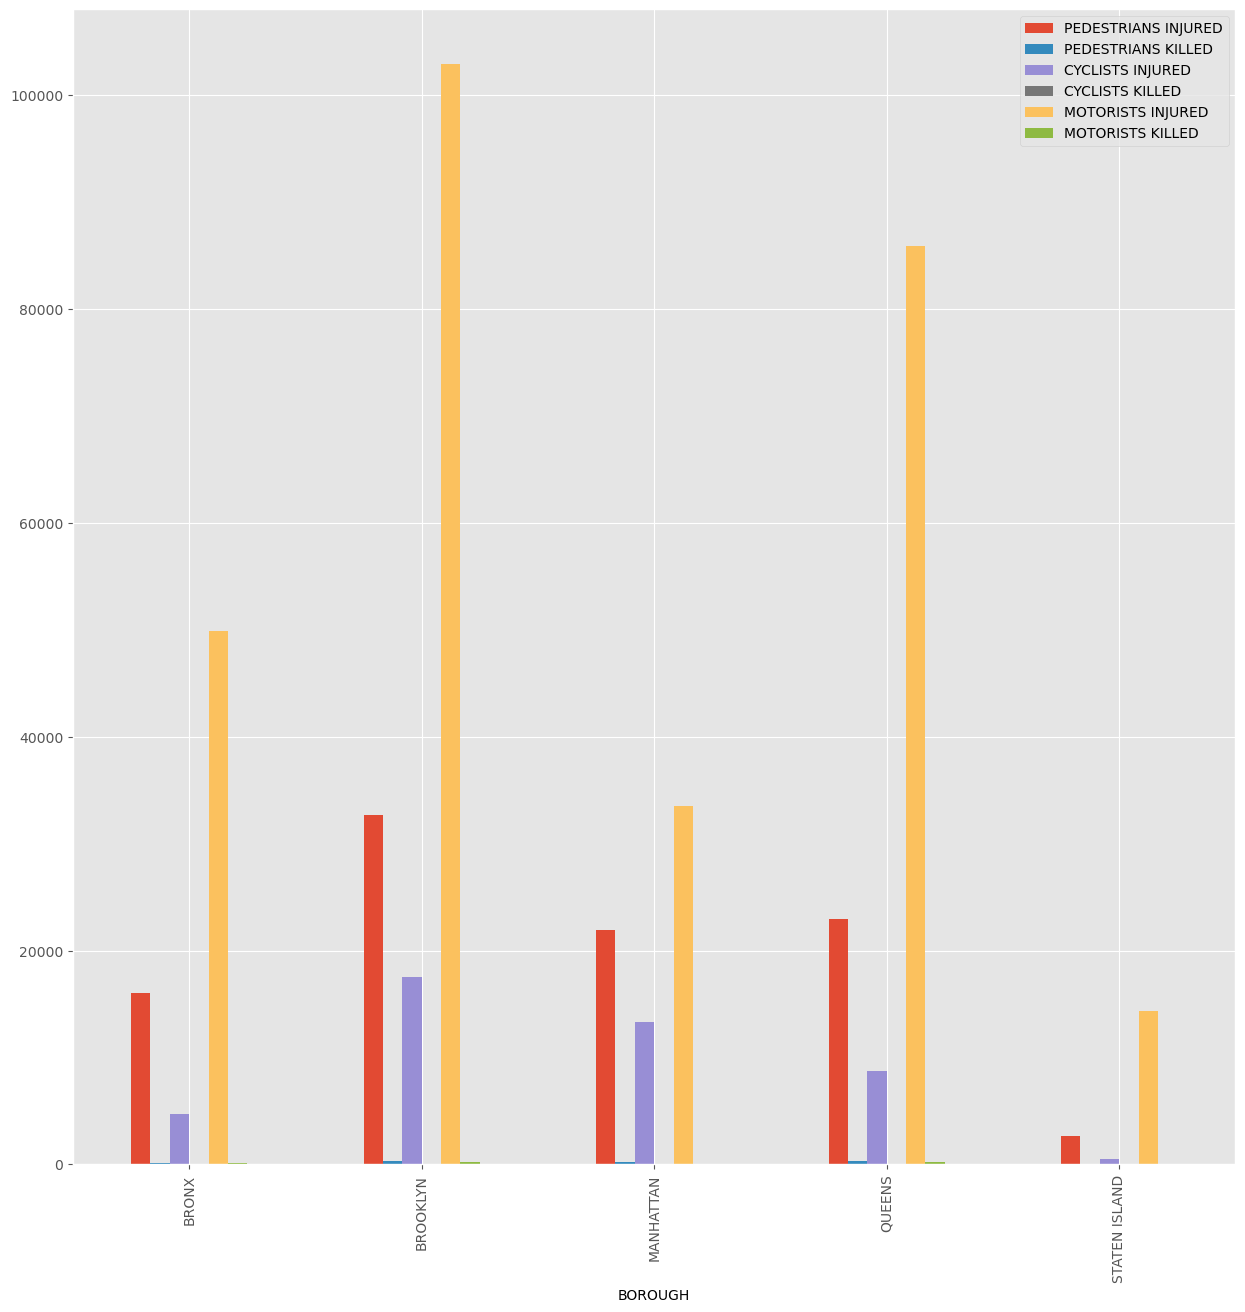

In [19]:
injured_or_killed_by_borough.plot(kind="bar", figsize=(15,15));

In [20]:
injured_or_killed_by_year = accidents.groupby('YEAR').sum('PEDESTRIANS INJURED')
injured_or_killed_by_year

,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED
YEAR,,,,,,
2012,5352,62,2017,6,13648,42
2013,10767,132,3721,8,27568,73
2014,9861,108,3674,16,25111,59
2015,8926,105,3862,15,25034,58
2016,8650,86,3662,12,25678,27
2017,7949,78,3351,20,23878,41
2018,8207,80,3393,6,25462,53
2019,7925,90,3581,21,25754,28
2020,5060,59,4032,21,17599,69


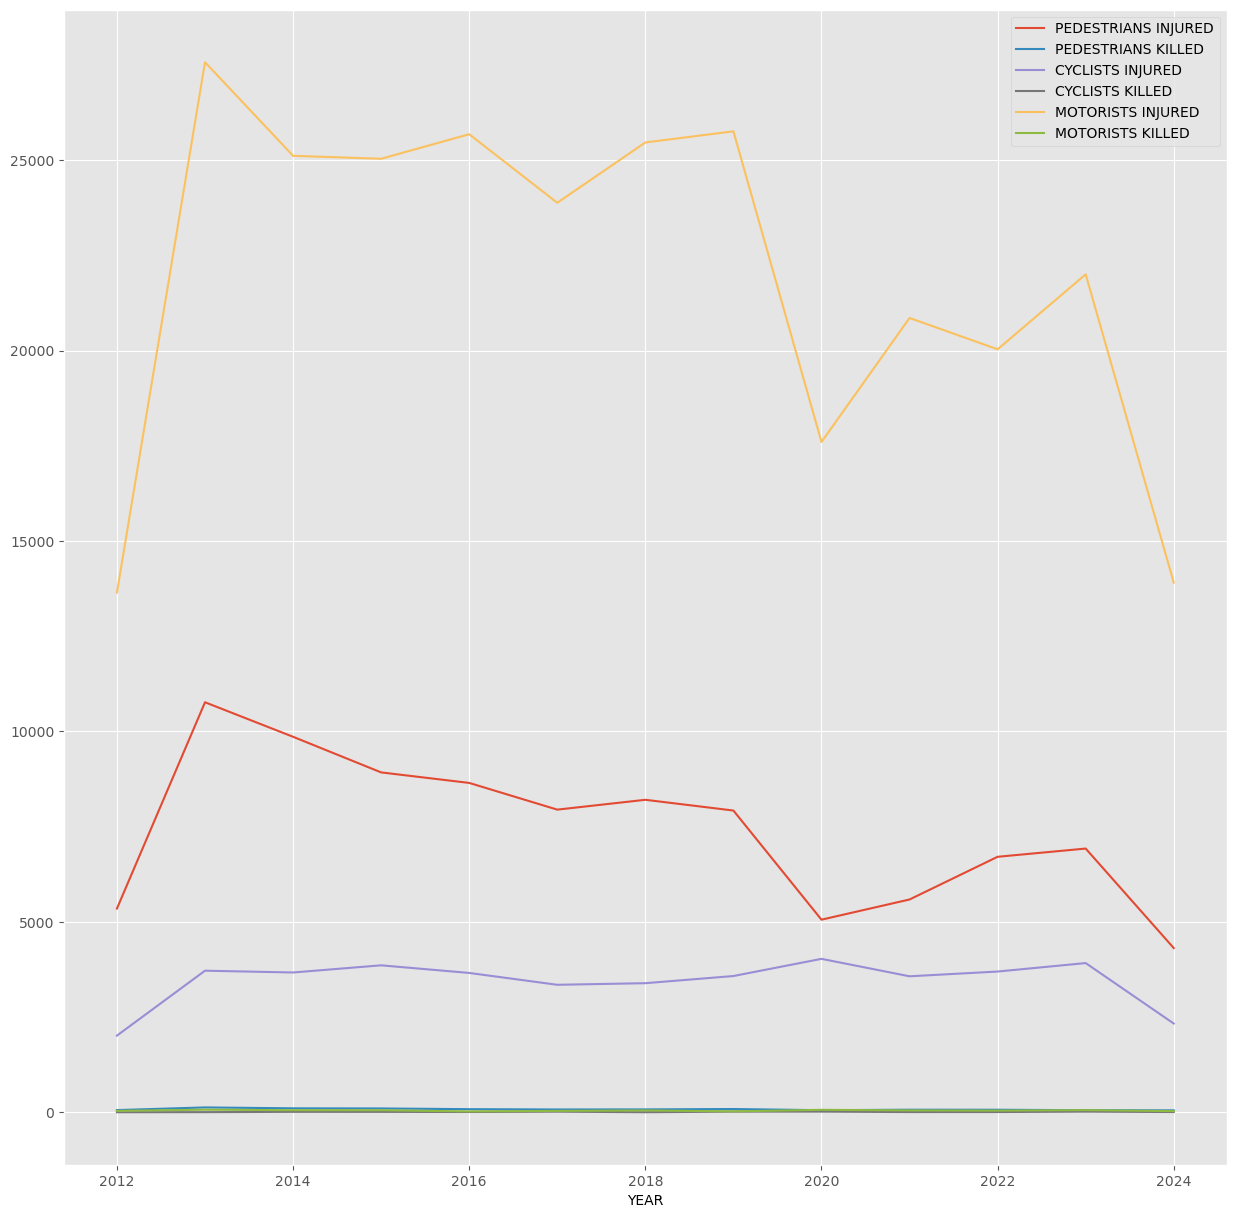

In [21]:
injured_or_killed_by_year.plot(kind="line", figsize=(15,15));

In [24]:
killed_or_injured_by_year_and_borough = accidents.groupby(['BOROUGH','YEAR']).sum()
killed_or_injured_by_year_and_borough

C:\Users\Andrea\AppData\Local\Temp\ipykernel_21476\2099108096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  killed_or_injured_by_year_and_borough = accidents.groupby(['BOROUGH','YEAR']).sum()


PEDESTRIANS INJURED  PEDESTRIANS KILLED  CYCLISTS INJURED  \
BOROUGH       YEAR                                                              
BRONX         2012                  753                   8               155   
              2013                 1672                  25               295   
              2014                 1505                  10               356   
              2015                 1372                  11               363   
              2016                 1345                  14               364   
              2017                 1354                  10               325   
              2018                 1444                  10               356   
              2019                 1410                   9               392   
              2020                  987                  10               615   
              2021                 1134                   5               413   
              2022                 1192                  13               409   
              2023                 1115                   7               395   
              2024                  718                   6               267   
BROOKLYN      2012                 1836                  19               879   
              2013                 3641                  30              1539   
              2014                 3348                  42              1409   
              2015                 3028                  46              1513   
              2016                 2917                  20              1452   
              2017                 2663                  20              1300   
              2018                 2785                  23              1368   
              2019                 2700                  33              1397   
              2020                 1780                  17              1553   
              2021                 1905                  32              1373   
              2022                 2275                  23              1427   
              2023                 2385                  21              1493   
              2024                 1468                  19               808   
MANHATTAN     2012                 1390                  17               554   
              2013                 2811                  29              1131   
              2014                 2586                  25              1156   
              2015                 2288                  18              1192   
              2016                 2076                  30              1109   
              2017                 1769                  21               974   
              2018                 1783                  13              1005   
              2019                 1565                  20              1032   
              2020                  882                   9               958   
              2021                 1121                  17              1022   
              2022                 1359                  18              1173   
              2023                 1391                  15              1251   
              2024                  903                  17               765   
QUEENS        2012                 1172                  15               402   
              2013                 2327                  45               721   
              2014                 2192                  26               714   
              2015                 2002                  25               764   
              2016                 2080                  19               691   
              2017                 1923                  23               703   
              2018                 2015                  31               625   
              2019                 2031                  26               720   
              2020                 1287            

In [25]:
df_numerized = accidents

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,BOROUGH,ZIP CODE,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,YEAR
3,1,145,0,0,0,0,0,0,9
4,1,169,0,0,0,0,0,0,9
7,0,126,0,0,0,0,2,0,9
8,1,144,0,0,0,0,0,0,9
9,2,16,0,0,0,0,0,0,9


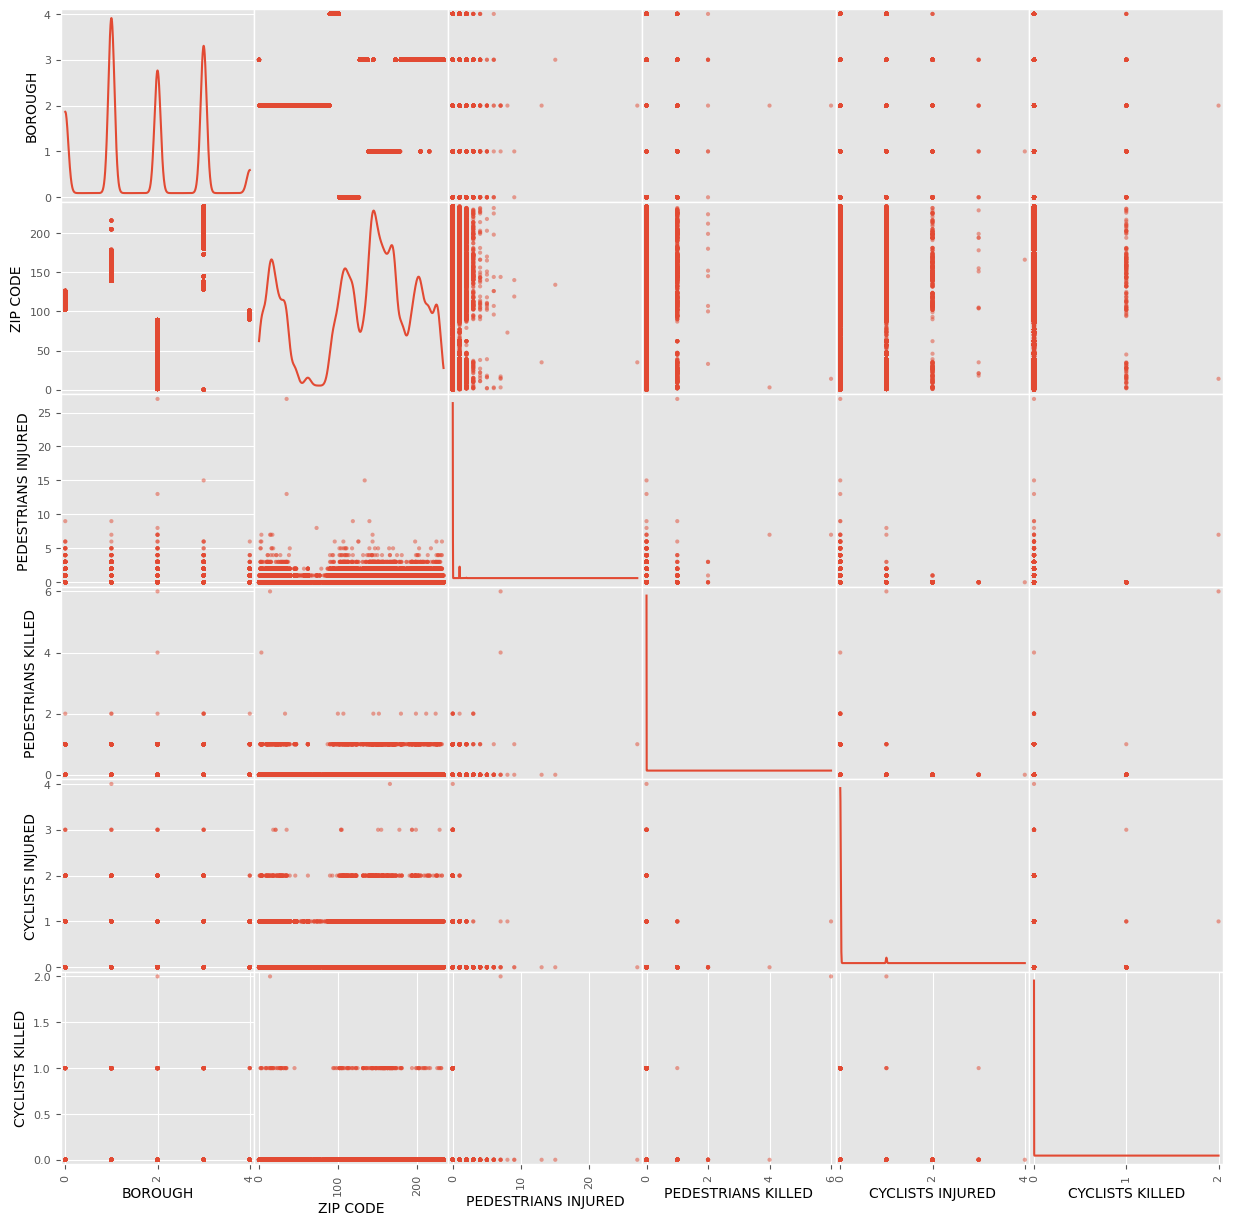

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_numerized.iloc[:,0:6], # Make a scatter matrix of 6 columns
               figsize=(15, 15),   # Set plot size
               diagonal='kde');    # Show distribution estimates on diagonal

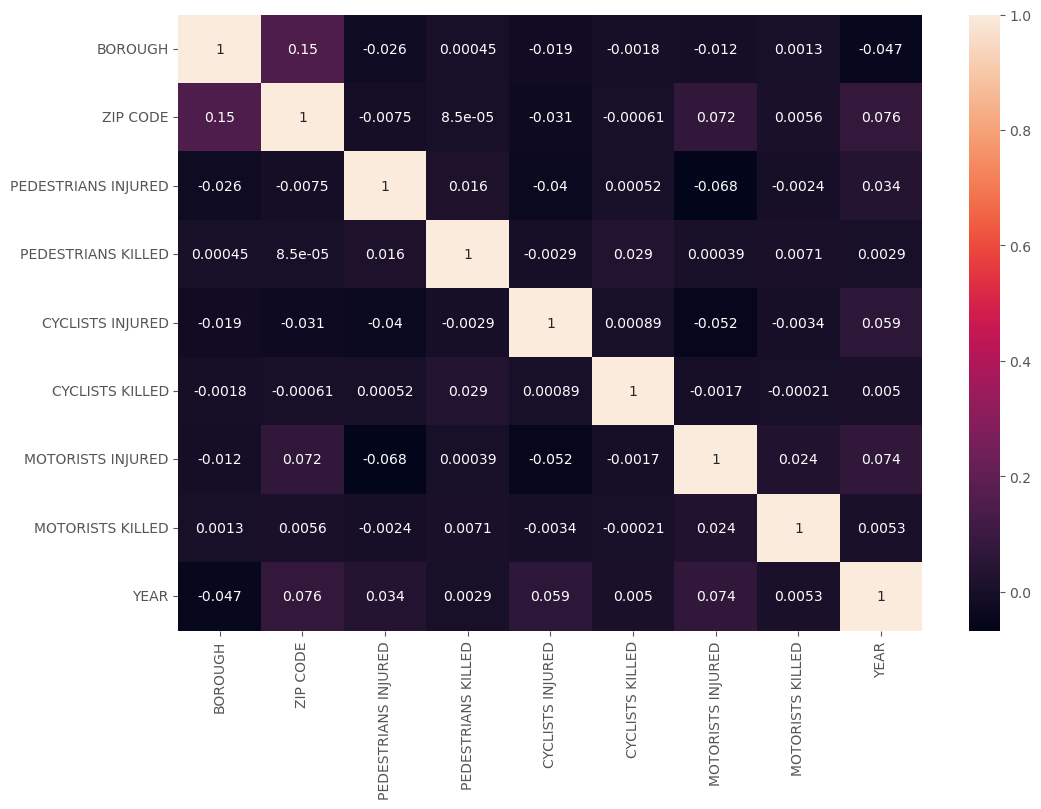

In [27]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()